<a href="https://colab.research.google.com/github/gameqube963741/data_analysis/blob/master/bitly_gov_dataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

In [2]:
import json
path = '/content/example.txt'
records = [json.loads(line) for line in open(path)]
# print(records)

In [3]:
records

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'al': 'en-US,en;q=0.8',
  'c': 'US',
  'cy': 'Danvers',
  'g': 'A6qOVH',
  'gr': 'MA',
  'h': 'wfLQtf',
  'hc': 1331822918,
  'hh': '1.usa.gov',
  'l': 'orofrog',
  'll': [42.576698, -70.954903],
  'nk': 1,
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  't': 1331923247,
  'tz': 'America/New_York',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'cy': 'Provo',
  'g': 'mwszkS',
  'gr': 'UT',
  'h': 'mwszkS',
  'hc': 1308262393,
  'hh': 'j.mp',
  'l': 'bitly',
  'll': [40.218102, -111.613297],
  'nk': 0,
  'r': 'http://www.AwareMap.com/',
  't': 1331923249,
  'tz': 'America/Denver',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php'},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

In [4]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
# print(time_zones[:10])

In [5]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [6]:
counts = get_counts(time_zones)
# print(counts)
# print('{} {} {}'.format('America/New_York :', counts['America/New_York'],'times'))
# print(len(time_zones))

In [7]:
# 最常出現時區排名
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]
# print(top_counts(counts))

In [8]:
# 使用函式庫 collection 類別
# 最常出現時區排名
from collections import Counter
counts = Counter(time_zones)
# print(counts)
# print(counts.most_common()[:10])#時區出現頻率

In [9]:
# 建立Dataframe
import pandas as pd
frame = pd.DataFrame(records)
print('finish')

finish


In [10]:
# 觀察 Dataframe 資訊
print(frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [11]:
# 觀察 'tz' 前10筆欄位資料
print(frame['tz'][:10])

# 觀察 'nk' 欄位
print(frame['nk'][:])

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object
0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
3555    1.0
3556    0.0
3557    0.0
3558    0.0
3559    0.0
Name: nk, Length: 3560, dtype: float64


In [12]:
# 有大型資料，可以使用 summary view 預覽資料
tz_counts = frame['tz'].value_counts()
print(tz_counts[:10])

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64


In [13]:
# 用 fillna 填補 "遺失值" 資料
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'  # 布林索引 換掉字串
tz_counts = clean_tz.value_counts()
print(tz_counts[:10])

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64


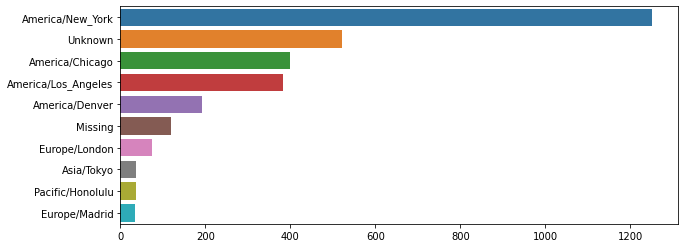

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 4))
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)
# plt.show()

In [15]:
# 使用者使用的瀏覽器資訊
print(frame['a'][1])
print(frame['a'][50])
print(frame['a'][51][:50])  # long line

GoogleMaps/RochesterNY
Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9


In [16]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
# print(results[:5])                 # 前 5 筆使用者瀏覽器
# print(results.value_counts()[:8])  # 瀏覽器次數計算

In [17]:
cframe = frame[frame.a.notnull()]    # a欄位 非空值資訊
# print(cframe)

In [18]:
cframe = cframe.copy()
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')
# print(cframe['os'][:5])

In [19]:
by_tz_os = cframe.groupby(['tz', 'os'])
agg_counts = by_tz_os.size().unstack().fillna(0)
print(agg_counts[:10])

os                              Not Windows  Windows
tz                                                  
                                      245.0    276.0
Africa/Cairo                            0.0      3.0
Africa/Casablanca                       0.0      1.0
Africa/Ceuta                            0.0      2.0
Africa/Johannesburg                     0.0      1.0
Africa/Lusaka                           0.0      1.0
America/Anchorage                       4.0      1.0
America/Argentina/Buenos_Aires          1.0      0.0
America/Argentina/Cordoba               0.0      1.0
America/Argentina/Mendoza               0.0      1.0


In [20]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
print(indexer[:10])

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64


In [21]:
count_subset = agg_counts.take(indexer[-10:])
print(count_subset)

os                   Not Windows  Windows
tz                                       
America/Sao_Paulo           13.0     20.0
Europe/Madrid               16.0     19.0
Pacific/Honolulu             0.0     36.0
Asia/Tokyo                   2.0     35.0
Europe/London               43.0     31.0
America/Denver             132.0     59.0
America/Los_Angeles        130.0    252.0
America/Chicago            115.0    285.0
                           245.0    276.0
America/New_York           339.0    912.0


In [22]:
print(agg_counts.sum(1).nlargest(10))

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64


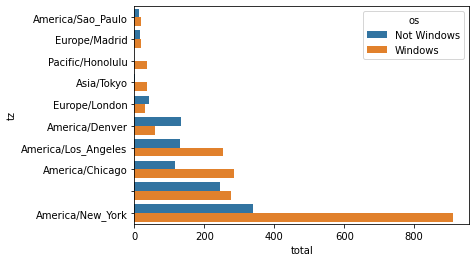

In [23]:
plt.figure()
# Rearrange the data for plotting
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]
sns.barplot(x='total', y='tz', hue='os',  data=count_subset)
# plt.show()

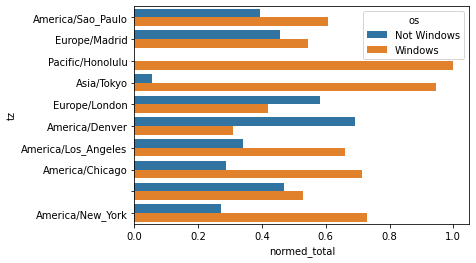

In [24]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)
plt.figure()
sns.barplot(x='normed_total', y='tz', hue='os',  data=results)
# plt.show()

In [25]:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')